# 학습관련 기술들

## 확률적 경사 하강법(SGD)

$W \leftarrow W - \eta\frac{\partial{L}}{\partial{W}}$
* $\eta$ = learning rate(학습률), 대부분 0.01이나 0.0001같은 고정 상수 값
* SGD는 기울어진 방향으로 일정 거리만 가겠다는 단순한 방법

### SGD의 단점
* 단순하고 구현도 쉽지만, 문제에 따라서는 비효쥴적일 때가 있다.
* $f(x, y) = \frac{1}{20}x^2+y$라는 함수의 최솟값을 구하는 문제
* y축 방향은 가파른데 x축 방향은 완만하여 최솟값이 되는 장소는 (x, y) = (0, 0)이지만 실제로 기울기를 구하면 대부분은 (0, 0)방향을 가리키지 않게 된다.
* SGD를 적용하여 최솟값을 구하면 (0, 0)지점으로 이동하긴 하지만 지그재그로 이동하여 탐색 경로가 비효율적임
* 즉, SGD가 지그재그로 탐색하는 근본 원인은 기울어진 방향이 본래의 최솟값과 다른 방향을 가리키기 때문이다.

In [25]:
class SGD:
  def __init__(self, lr = 0.01):
    self.lr = lr
  
  def update(self, params, grads):
    for key in params.key():
      params[key] -= self.lr * grads[key]

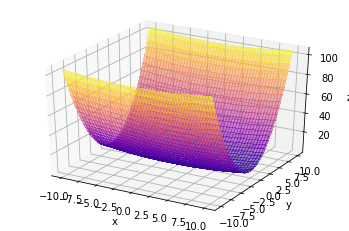

In [26]:
import matplotlib.pyplot as plt
import numpy as np

def get_z(x, y):
  z = ((1/20) * x**2) + y**2
  return z

x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x, y)
Z = get_z(X, Y)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, cmap="plasma", linewidth=0, antialiased=False, alpha=0.5)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');
plt.show()

# 모멘텀(Momentum)
* SGD의 단점을 개선해주는 모멘텀
* $v ← αv - η\frac{∂L}{∂W}$ `1.1`
* $W ← W + v$ `1.2`   
식 `1.1`은 기울기 방향으로 힘을 받아 물체가 가속된다는 물리법칙을 나타냄. 또한 $αv$항은 물체가 아무런 힘을 받지 않을 때 서서히 하강시키는 역할($α$는 0.9등의 값으로 설정, 물리지면에서의 지면 마찰이나 공기 저항에 해당)
* 모멘텀의 최솟값 갱신 경로는 SGD와 비교하여 지그재그 정도가 덜한 곳으로 최적화를 해나간다.
* x축의 힘은 아주 작지만 방향은 변하지 않아서 한 방향으로 일정하게 가속하기 때문이다. 거꾸로 y축의 힘은 크지만 위아래로 번갈아 받아서 상충하여 y축 방향의 속도는 안정적이지 않음. 전체적으로 SGD보다 x축방향으로 빠르게 다가가 지그재그 움직임이 줄어듬

In [27]:
class Momentum:
  def __init__(self, lr=0.01, momentum=0.9):
    self.lr = lr
    self.momentum = momentum
    self.v = None

  def update(self, params, grads):
    if self.v is None:
      self.v = {}
      for key, val in params.items():
        self.v[key] = np.zeros_like(val)

      for key in params.keys():
        self.v[key] = self.momentum*self.v[key] - self.lr*grads[key]
        params[key] += self.v[key]

# AdaGrad
신경망 학습에서는 학습률 값이 중요하다. 이 값이 너무 작으면 학습 시간이 너무 길어지고, 반대로 너무 크면 발산하여 학습이 제대로 이뤄지지 않는다.
이 학습률을 정하는 효과적 기술로 학습률 감소(learning rate decay)가 존재한다.

> learning rate decay: 학습을 진행하면서 학습률을 점차 줄여가는 방법, 처음은 크게 학습하다가 조금씩 작게 학습한다는 얘기로, 실제 신경망 학습에 자주 쓰인다.
> 학습률을 서서히 낮추는 가장 간단한 방법은 매개변수 전체의 학습률 값을 일괄적으로 낮추는 것, 이를 더욱 발전시킨 것이 AdaGrad

AdaGrad는 각각의 매개변수에 맞춤형 값을 만들어 준다. 즉, 개별 매개변수에 적응적으로(adaptive)학습률을 조정하면서 학습을 진행한다.

* $h ← h + \frac{∂L}{∂W}\bigodot\frac{∂L}{∂W}$
* $W ← W - \eta\frac{1}{\sqrt{h}}\frac{∂L}{∂W}$   
* $\bigodot$: 행렬의 원소별 곱셈  
h는 기존 기울기 값을 제곱하여 계속해서 더해줌, 그리고 매개변수를 갱신할때 $\frac{1}{\sqrt{h}}$을 곱해 학습률을 조정한다. 매개변수의 원소 중에서 많이 움직인(크게 갱신된)원소는 학습률이 낮아진다는 의미를 가지고 있다.   
* 최솟값을 향해 효율적으로 움직이며 y축 방향은 기울기가 커서 처음에는 크게 움직이지만, 그 큰 움직임에 비례해 갱신 정도도 큰 폭으로 작아지도록 조정된다. 그래서 y축 방향으로 갱신 강도가 빠르게 약해지고, 지그재그 움직임이 줄어든다.

In [28]:
class AdaGrad:
  def __init__(self, lr=0.01):
    self.lr = lr
    self.h = None

  def update(self, params, grads):
    if self.h is None:
      self.h = {}
      for key, val in params.items():
        self.h[key] = np.zeros_like(val)
      
      for key in params.keys():
        self.h[key] += grads[key] * grads[key]
        params[key] -= self.lr * grads[key] / np.sqrt(self.h[key] + 1e-7)

# Adam
모멘텀은 공이 그릇 바닥을 구르는 듯한 움직임을 보이고, AdaGrad는 매개변수의 원소마다 적응적으로 갱신 정도를 조정했다. 이 두 최적화 기법을 융합한 것이 Adam
* 하이퍼파라미터의 '편향 보정'이 진행된다는 점이 특징
* 모멘텀과 비슷한 패턴을 띄지만, 모멘텀 때보다 공의 좌우 흔들림이 적다. 이는 학습의 갱신 강도를 적응적으로 조정해서 얻는 혜택이다.
* Adam은 3개의 하이퍼파라미터를 설정한다.($\eta$:학습률, $\beta_1$:일차 모멘텀용 계수, $\beta_2$: 이차 모멘텀용 계수, 논문에 따르면 $\beta_1=0.9$, $\beta_2=0.999$)

# 결론
* 어떤 최적화 기법을 사용해야 하는가?
* 풀어야 할 문제가 무엇이냐에 따라 달라진다, 또한 학습률 등의 하이퍼파라미터를 어떻게 설정하느냐에 따라서 결과가 달라진다.
* 결국 모든 문제에서 항상 뛰어난 기법이라는것은 아직 존재하지 않는다.

***

# 가중치의 초깃값
신경망 학습에서 특히 중용한 것이 가중치의 초깃값이다. 가중치의 초깃값을 무엇으로 설정하느냐가 신경망 학습의 성패가 가르는 일이 실제로 자주 존재한다.

# 가중치 감소(weight decay)
가중치 감소는 가중치 매개변수의 값이 작아지도록 학습하는 방법, 가중치 값을 작게 하여 오버피팅이 일어나지 않게 하는 것
* 만약 가중치의 초깃값을 모두 0으로 설정하면(가중치를 균일한 값으로 설정하면)?:오차역전파에서 모든 가중치의 값이 똑같이 갱신되기 때문에 학습이 올바로 이뤄지지 않는다.
* 2층 신경망에서 첫번째와 두번째 층의 가중치가 0이라고 가정
* 순전파 때는 입력층의 가중치가 0이기 때문에 두번째 층의 뉴런에 모두 같은 값이 전달
* 두번째 층의 모든 뉴런에 같은 값이 입력된다는 것은 역전파 때 두번째 층의 가중치가 모두 똑같이 갱신된다는 말
* 가중치들은 같은 초깃값에서 시작하고 갱신을 거쳐도 여전히 같은 값을 유지
* 따라서 가중치의 대칭적인 구조를 무너뜨리려면 **가중치의 초깃값을 무작위**로 설정해야 한다.

## Case 1: 가중치를 표준편차가 1인 정규분포로 초기화할 때의 각 층의 활성화값 분포(np.random.randn(node_num, node_num) * 1)

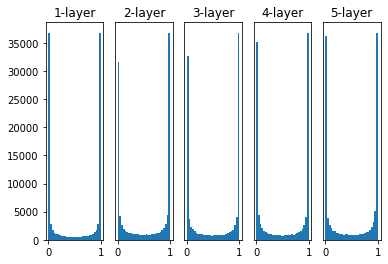

In [29]:
# coding: utf-8
import numpy as np
import matplotlib.pyplot as plt


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def ReLU(x):
    return np.maximum(0, x)


def tanh(x):
    return np.tanh(x)
    
input_data = np.random.randn(1000, 100)  # 1000개의 데이터
node_num = 100  # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5  # 은닉층이 5개
activations = {}  # 이곳에 활성화 결과를 저장

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    # 초깃값을 다양하게 바꿔가며 실험해보자！
    w = np.random.randn(node_num, node_num) * 1
    # w = np.random.randn(node_num, node_num) * 0.01
    # w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)
    # w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)


    a = np.dot(x, w)


    # 활성화 함수도 바꿔가며 실험해보자！
    z = sigmoid(a)
    # z = ReLU(a)
    # z = tanh(a)

    activations[i] = z

# 히스토그램 그리기
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    # plt.xlim(0.1, 1)
    # plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

* 각 층의 활성화 값들이 0과 1이 치우쳐져 분포되어 있다. 데이터가 0과 1에 치우쳐 분포하게 되면 역전파의 기울기 값이 점점 작아지다가 사라진다.(sigmoid함수 모양 생각)
* 이것이 **기울기 소실**이라고 알려진 문제이다. 층을 깊게 하는 딥러닝에서는 기울기 소실이 심각한 문제가 된다.

#### Case 2: 가중치를 표준편차가 0.01인 정규분포로 초기화할 때의 각 층의 활성화값 분포(np.random.randn(node_num, node_num) * 0.01)

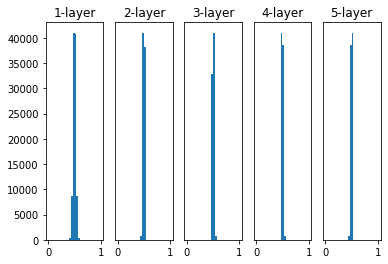

In [30]:
# coding: utf-8
import numpy as np
import matplotlib.pyplot as plt


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def ReLU(x):
    return np.maximum(0, x)


def tanh(x):
    return np.tanh(x)
    
input_data = np.random.randn(1000, 100)  # 1000개의 데이터
node_num = 100  # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5  # 은닉층이 5개
activations = {}  # 이곳에 활성화 결과를 저장

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    # 초깃값을 다양하게 바꿔가며 실험해보자！
    # w = np.random.randn(node_num, node_num) * 1
    w = np.random.randn(node_num, node_num) * 0.01
    # w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)
    # w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)


    a = np.dot(x, w)


    # 활성화 함수도 바꿔가며 실험해보자！
    z = sigmoid(a)
    # z = ReLU(a)
    # z = tanh(a)

    activations[i] = z

# 히스토그램 그리기
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    # plt.xlim(0.1, 1)
    # plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

* 이번에는 0.5부근에 집중되어 있다. 앞의 예처럼 0과 1로 치우치진 않았으니 기울기 소실문제는 발생하지 않는다.
* 하지만, 활성화 값들이 치우쳤다는 것은 다수의 뉴런이 거의 같은 값을 출력하고 있으니 뉴런을 여러 개 둔 의미가 없어진다는 뜻이다. 즉 뉴런 100개가 거의 같은 값을 출력한다면 뉴런 1개짜리와 별반 차이점이 존재하지 않는다는 것이다.

#### Case 3: 가중치의 초깃값으로 'Xavier 초깃값: 표준편차가 $\frac{1}{\sqrt{n}}$인 정규분포'을 이용할 때의  각 층의 활성화값 분포(np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num))

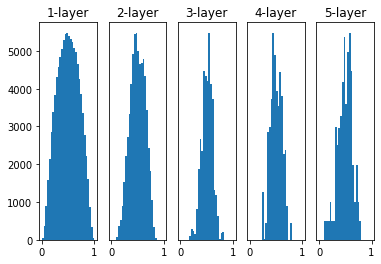

In [31]:
# coding: utf-8
import numpy as np
import matplotlib.pyplot as plt


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def ReLU(x):
    return np.maximum(0, x)


def tanh(x):
    return np.tanh(x)
    
input_data = np.random.randn(1000, 100)  # 1000개의 데이터
node_num = 100  # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5  # 은닉층이 5개
activations = {}  # 이곳에 활성화 결과를 저장

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    # 초깃값을 다양하게 바꿔가며 실험해보자！
    # w = np.random.randn(node_num, node_num) * 1
    # w = np.random.randn(node_num, node_num) * 0.01
    w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)
    # w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)


    a = np.dot(x, w)


    # 활성화 함수도 바꿔가며 실험해보자！
    z = sigmoid(a)
    # z = ReLU(a)
    # z = tanh(a)

    activations[i] = z

# 히스토그램 그리기
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    # plt.xlim(0.1, 1)
    # plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

* 층이 깊어지면서 형태가 다소 일그러 지지만, 앞에서 본 방식보다는 확실히 넓게 분포됨을 알 수 있음
* 각 층의 데이터는 적당히 분포되어있으므로, 시그모이드 함수의 표현력도 제한받지 않고 학습이 효율적으로 이뤄질 것으로 기대된다.

#### Case 4: 가중치의 초깃값으로 'He 초깃값: 표준편차가 $\frac{2}{\sqrt{n}}$인 정규분포'을 이용할 때의  각 층의 활성화값 분포(np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num))

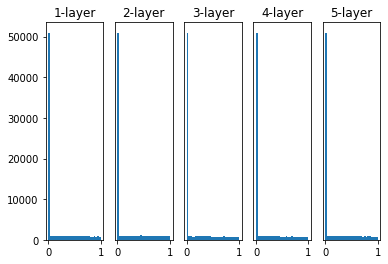

In [32]:
# coding: utf-8
import numpy as np
import matplotlib.pyplot as plt


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def ReLU(x):
    return np.maximum(0, x)


def tanh(x):
    return np.tanh(x)
    
input_data = np.random.randn(1000, 100)  # 1000개의 데이터
node_num = 100  # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5  # 은닉층이 5개
activations = {}  # 이곳에 활성화 결과를 저장

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    # 초깃값을 다양하게 바꿔가며 실험해보자！
    # w = np.random.randn(node_num, node_num) * 1
    # w = np.random.randn(node_num, node_num) * 0.01
    # w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)
    w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)


    a = np.dot(x, w)


    # 활성화 함수도 바꿔가며 실험해보자！
    # z = sigmoid(a)
    z = ReLU(a)
    # z = tanh(a)

    activations[i] = z

# 히스토그램 그리기
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    # plt.xlim(0.1, 1)
    # plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

# 결론
* He 초깃값은 모든 층에서 균일하게 분포되어있음
* 층이 깊어져도 분포가 균일하게 유지되기에 역전파 때도 적절한 값이 나올것으로 기대됨
* **활성화 함수로 ReLU를 사용할 때는 He초깃값을, sigmoid나 tanh 등의 s자 모양 곡선일 때는 Xavier 초깃값을 사용**
***

# 배치 정규화(batch normalization)
* 가중치 초깃값 설정에 따른 활성화 값을 퍼뜨리는 것뿐만 아니라 만약 각 층이 활성화를 적당히 퍼뜨리도록 '강제'한다면?
* 장점   
1) 학습을 빨리 진행할 수 있다(학습 속도 개선)     
2) 초깃값에 크게 의존하지 않는다!   
3) 오버피팅을 억제한다(드롭아웃 등의 필요성 감소)   
4) 배치 정규화 `batch norm 계층`을 신경망에 삽입한다.

* 배치 정규화는 학습 시 미니배치를 단위로 정규화한다. 구체적으로는 데이터 분포가 평균이 0,표준편차가 1이 되도록 정규화한다.   
$μ_B ← \frac{1}{m}\Sigma_{i=1}^m x_i$   
$σ_B^2 ← \frac{1}{m}\Sigma_{i=1}^m (x_i-μ_B)^2$   
$\hat{x}_i=\frac{x_i-μ_B}{\sqrt{σ_B^2+ϵ}}$   
* 미니배치 $B=[x_1, x_2, …, x_m]$이라는 m개의 입력 데이터의 집합에 대해 평균과 분산을 구하고 입력 데이터를 평균이 0, 분산이 1이 되게 정규화 한다(여기서 $ϵ=10e-7$등으로 아주 작은 값)
* 수식의 마지막은 미니배치 입력 데이터 B를 평균0, 분산1인 데이터의 집합 $[\hat{x}_1, \hat{x}_2, \dots, \hat{x}_m]$으로 변환하는 것
* 이 처리를 활성화 함수의 앞(혹은 뒤)에 삽입함으로써 데이터 분포가 덜 치우치게 할 수 있다.
* 배치 정규화 계층마다 이 정규화된 데이터에 고유한 확대(scaling)와 이동변환(shifting)을 수행한다.   
$y_i=γ\hat{x}_i+β$
감마가 확대를, 베타가 이동을 담당하며, 두 값은 처음에는 감마=1, 베타=0 부터 시작하고 학습하면서 적합한 값으로 조정해간다.

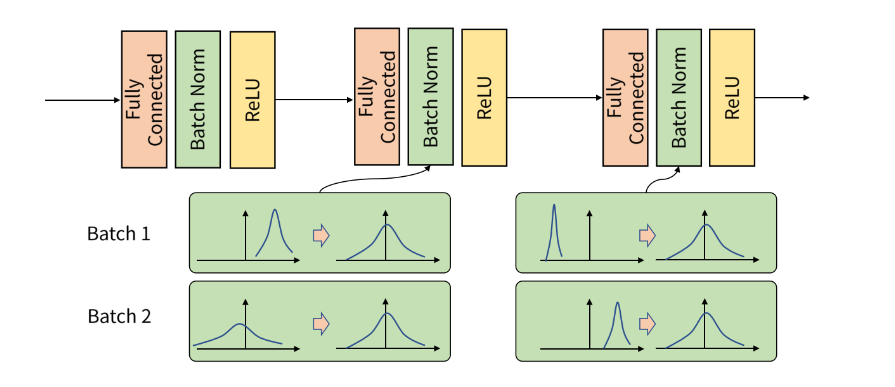

In [48]:
import os
from google.colab import drive
drive.mount('/content/drive/')
%cd '/content/drive/My Drive/Colab_Notebooks'

import numpy as np
from collections import OrderedDict
from common.layers import *
from common.gradient import numerical_gradient


class MultiLayerNet:
    """완전연결 다층 신경망

    Parameters
    ----------
    input_size : 입력 크기（MNIST의 경우엔 784）
    hidden_size_list : 각 은닉층의 뉴런 수를 담은 리스트（e.g. [100, 100, 100]）
    output_size : 출력 크기（MNIST의 경우엔 10）
    activation : 활성화 함수 - 'relu' 혹은 'sigmoid'
    weight_init_std : 가중치의 표준편차 지정（e.g. 0.01）
        'relu'나 'he'로 지정하면 'He 초깃값'으로 설정
        'sigmoid'나 'xavier'로 지정하면 'Xavier 초깃값'으로 설정
    weight_decay_lambda : 가중치 감소(L2 법칙)의 세기
    """
    def __init__(self, input_size, hidden_size_list, output_size,
                 activation='relu', weight_init_std='relu', weight_decay_lambda=0):
        self.input_size = input_size
        self.output_size = output_size
        self.hidden_size_list = hidden_size_list
        self.hidden_layer_num = len(hidden_size_list)
        self.weight_decay_lambda = weight_decay_lambda
        self.params = {}

        # 가중치 초기화
        self.__init_weight(weight_init_std)

        # 계층 생성
        activation_layer = {'sigmoid': Sigmoid, 'relu': Relu}
        self.layers = OrderedDict()
        for idx in range(1, self.hidden_layer_num+1):
            self.layers['Affine' + str(idx)] = Affine(self.params['W' + str(idx)],
                                                      self.params['b' + str(idx)])
            self.layers['Activation_function' + str(idx)] = activation_layer[activation]()

        idx = self.hidden_layer_num + 1
        self.layers['Affine' + str(idx)] = Affine(self.params['W' + str(idx)],
            self.params['b' + str(idx)])

        self.last_layer = SoftmaxWithLoss()

    def __init_weight(self, weight_init_std):
        """가중치 초기화
        
        Parameters
        ----------
        weight_init_std : 가중치의 표준편차 지정（e.g. 0.01）
            'relu'나 'he'로 지정하면 'He 초깃값'으로 설정
            'sigmoid'나 'xavier'로 지정하면 'Xavier 초깃값'으로 설정
        """
        all_size_list = [self.input_size] + self.hidden_size_list + [self.output_size]
        for idx in range(1, len(all_size_list)):
            scale = weight_init_std
            if str(weight_init_std).lower() in ('relu', 'he'):
                scale = np.sqrt(2.0 / all_size_list[idx - 1])  # ReLU를 사용할 때의 권장 초깃값
            elif str(weight_init_std).lower() in ('sigmoid', 'xavier'):
                scale = np.sqrt(1.0 / all_size_list[idx - 1])  # sigmoid를 사용할 때의 권장 초깃값
            self.params['W' + str(idx)] = scale * np.random.randn(all_size_list[idx-1], all_size_list[idx])
            self.params['b' + str(idx)] = np.zeros(all_size_list[idx])

    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)

        return x

    def loss(self, x, t):
        """손실 함수를 구한다.
        
        Parameters
        ----------
        x : 입력 데이터
        t : 정답 레이블 
        
        Returns
        -------
        손실 함수의 값
        """
        y = self.predict(x)

        weight_decay = 0
        for idx in range(1, self.hidden_layer_num + 2):
            W = self.params['W' + str(idx)]
            weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W ** 2)

        return self.last_layer.forward(y, t) + weight_decay

    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        if t.ndim != 1 : t = np.argmax(t, axis=1)

        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy

    def numerical_gradient(self, x, t):
        """기울기를 구한다(수치 미분).
        
        Parameters
        ----------
        x : 입력 데이터
        t : 정답 레이블
        
        Returns
        -------
        각 층의 기울기를 담은 딕셔너리(dictionary) 변수
            grads['W1']、grads['W2']、... 각 층의 가중치
            grads['b1']、grads['b2']、... 각 층의 편향
        """
        loss_W = lambda W: self.loss(x, t)

        grads = {}
        for idx in range(1, self.hidden_layer_num+2):
            grads['W' + str(idx)] = numerical_gradient(loss_W, self.params['W' + str(idx)])
            grads['b' + str(idx)] = numerical_gradient(loss_W, self.params['b' + str(idx)])

        return grads

    def gradient(self, x, t):
        """기울기를 구한다(오차역전파법).

        Parameters
        ----------
        x : 입력 데이터
        t : 정답 레이블
        
        Returns
        -------
        각 층의 기울기를 담은 딕셔너리(dictionary) 변수
            grads['W1']、grads['W2']、... 각 층의 가중치
            grads['b1']、grads['b2']、... 각 층의 편향
        """
        # forward
        self.loss(x, t)

        # backward
        dout = 1
        dout = self.last_layer.backward(dout)

        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)

        # 결과 저장
        grads = {}
        for idx in range(1, self.hidden_layer_num+2):
            grads['W' + str(idx)] = self.layers['Affine' + str(idx)].dW + self.weight_decay_lambda * self.layers['Affine' + str(idx)].W
            grads['b' + str(idx)] = self.layers['Affine' + str(idx)].db

        return grads

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content


In [50]:
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.optimizer import SGD, Adam

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 학습 데이터를 줄임
x_train = x_train[:1000]
t_train = t_train[:1000]

max_epochs = 20
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01


def __train(weight_init_std):
    bn_network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10, 
                                    weight_init_std=weight_init_std, use_batchnorm=True)
    network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10,
                                weight_init_std=weight_init_std)
    optimizer = SGD(lr=learning_rate)
    
    train_acc_list = []
    bn_train_acc_list = []
    
    iter_per_epoch = max(train_size / batch_size, 1)
    epoch_cnt = 0
    
    for i in range(1000000000):
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[batch_mask]
        t_batch = t_train[batch_mask]
    
        for _network in (bn_network, network):
            grads = _network.gradient(x_batch, t_batch)
            optimizer.update(_network.params, grads)
    
        if i % iter_per_epoch == 0:
            train_acc = network.accuracy(x_train, t_train)
            bn_train_acc = bn_network.accuracy(x_train, t_train)
            train_acc_list.append(train_acc)
            bn_train_acc_list.append(bn_train_acc)
    
            print("epoch:" + str(epoch_cnt) + " | " + str(train_acc) + " - " + str(bn_train_acc))
    
            epoch_cnt += 1
            if epoch_cnt >= max_epochs:
                break
                
    return train_acc_list, bn_train_acc_list

============== 1/16 ==============
epoch:0 | 0.117 - 0.078


/content/drive/My Drive/Colab_Notebooks/common/multi_layer_net_extend.py:104: RuntimeWarning: overflow encountered in square
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)
/content/drive/My Drive/Colab_Notebooks/common/multi_layer_net_extend.py:104: RuntimeWarning: invalid value encountered in double_scalars
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)
/content/drive/My Drive/Colab_Notebooks/common/functions.py:34: RuntimeWarning: invalid value encountered in subtract
  x = x - np.max(x, axis=0)


epoch:1 | 0.1 - 0.09
epoch:2 | 0.097 - 0.092
epoch:3 | 0.097 - 0.131
epoch:4 | 0.097 - 0.162
epoch:5 | 0.097 - 0.185
epoch:6 | 0.097 - 0.206
epoch:7 | 0.097 - 0.233
epoch:8 | 0.097 - 0.244
epoch:9 | 0.097 - 0.269
epoch:10 | 0.097 - 0.284
epoch:11 | 0.097 - 0.294
epoch:12 | 0.097 - 0.307
epoch:13 | 0.097 - 0.328
epoch:14 | 0.097 - 0.349
epoch:15 | 0.097 - 0.356
epoch:16 | 0.097 - 0.37
epoch:17 | 0.097 - 0.389
epoch:18 | 0.097 - 0.397


epoch:19 | 0.097 - 0.412
============== 2/16 ==============
epoch:0 | 0.097 - 0.077
epoch:1 | 0.097 - 0.112
epoch:2 | 0.097 - 0.153
epoch:3 | 0.097 - 0.178
epoch:4 | 0.097 - 0.191
epoch:5 | 0.097 - 0.203
epoch:6 | 0.097 - 0.225
epoch:7 | 0.097 - 0.25
epoch:8 | 0.097 - 0.285
epoch:9 | 0.097 - 0.294
epoch:10 | 0.097 - 0.325
epoch:11 | 0.097 - 0.342
epoch:12 | 0.097 - 0.362
epoch:13 | 0.097 - 0.38
epoch:14 | 0.097 - 0.398
epoch:15 | 0.097 - 0.418
epoch:16 | 0.097 - 0.445
epoch:17 | 0.097 - 0.46
epoch:18 | 0.097 - 0.469


epoch:19 | 0.097 - 0.477
============== 3/16 ==============
epoch:0 | 0.093 - 0.096
epoch:1 | 0.332 - 0.116
epoch:2 | 0.438 - 0.158
epoch:3 | 0.514 - 0.178
epoch:4 | 0.597 - 0.223
epoch:5 | 0.649 - 0.264
epoch:6 | 0.706 - 0.325
epoch:7 | 0.74 - 0.367
epoch:8 | 0.77 - 0.402
epoch:9 | 0.806 - 0.44
epoch:10 | 0.833 - 0.466
epoch:11 | 0.864 - 0.509
epoch:12 | 0.884 - 0.525
epoch:13 | 0.907 - 0.549
epoch:14 | 0.906 - 0.574
epoch:15 | 0.923 - 0.606
epoch:16 | 0.94 - 0.607
epoch:17 | 0.945 - 0.631
epoch:18 | 0.95 - 0.642


epoch:19 | 0.954 - 0.664
============== 4/16 ==============
epoch:0 | 0.127 - 0.069
epoch:1 | 0.239 - 0.101
epoch:2 | 0.385 - 0.192
epoch:3 | 0.498 - 0.311
epoch:4 | 0.567 - 0.375
epoch:5 | 0.621 - 0.434
epoch:6 | 0.666 - 0.478
epoch:7 | 0.703 - 0.528
epoch:8 | 0.727 - 0.576
epoch:9 | 0.753 - 0.606
epoch:10 | 0.773 - 0.631
epoch:11 | 0.789 - 0.653
epoch:12 | 0.798 - 0.676
epoch:13 | 0.806 - 0.695
epoch:14 | 0.812 - 0.711
epoch:15 | 0.836 - 0.733
epoch:16 | 0.845 - 0.756
epoch:17 | 0.85 - 0.772
epoch:18 | 0.851 - 0.78


epoch:19 | 0.868 - 0.796
============== 5/16 ==============
epoch:0 | 0.096 - 0.173
epoch:1 | 0.096 - 0.18
epoch:2 | 0.096 - 0.315
epoch:3 | 0.097 - 0.447
epoch:4 | 0.096 - 0.548
epoch:5 | 0.104 - 0.629
epoch:6 | 0.118 - 0.666
epoch:7 | 0.123 - 0.709
epoch:8 | 0.127 - 0.737
epoch:9 | 0.126 - 0.765
epoch:10 | 0.137 - 0.798
epoch:11 | 0.126 - 0.809
epoch:12 | 0.13 - 0.818
epoch:13 | 0.152 - 0.833
epoch:14 | 0.17 - 0.846
epoch:15 | 0.194 - 0.858
epoch:16 | 0.198 - 0.864
epoch:17 | 0.202 - 0.876
epoch:18 | 0.215 - 0.884


epoch:19 | 0.214 - 0.892
============== 6/16 ==============
epoch:0 | 0.168 - 0.112
epoch:1 | 0.124 - 0.18
epoch:2 | 0.155 - 0.5
epoch:3 | 0.121 - 0.632
epoch:4 | 0.121 - 0.683
epoch:5 | 0.136 - 0.738
epoch:6 | 0.118 - 0.769
epoch:7 | 0.117 - 0.809
epoch:8 | 0.118 - 0.831
epoch:9 | 0.117 - 0.848
epoch:10 | 0.142 - 0.86
epoch:11 | 0.118 - 0.884
epoch:12 | 0.12 - 0.892
epoch:13 | 0.117 - 0.898
epoch:14 | 0.117 - 0.909
epoch:15 | 0.117 - 0.921
epoch:16 | 0.119 - 0.935
epoch:17 | 0.131 - 0.938
epoch:18 | 0.121 - 0.947


epoch:19 | 0.12 - 0.95
============== 7/16 ==============
epoch:0 | 0.1 - 0.097
epoch:1 | 0.116 - 0.37
epoch:2 | 0.116 - 0.6
epoch:3 | 0.116 - 0.701
epoch:4 | 0.117 - 0.751
epoch:5 | 0.117 - 0.812
epoch:6 | 0.117 - 0.849
epoch:7 | 0.117 - 0.88
epoch:8 | 0.117 - 0.907
epoch:9 | 0.117 - 0.92
epoch:10 | 0.117 - 0.933
epoch:11 | 0.117 - 0.948
epoch:12 | 0.117 - 0.95
epoch:13 | 0.117 - 0.959
epoch:14 | 0.117 - 0.97
epoch:15 | 0.117 - 0.974
epoch:16 | 0.117 - 0.977
epoch:17 | 0.117 - 0.983
epoch:18 | 0.117 - 0.985


epoch:19 | 0.117 - 0.985
============== 8/16 ==============
epoch:0 | 0.116 - 0.135
epoch:1 | 0.116 - 0.437
epoch:2 | 0.117 - 0.631
epoch:3 | 0.117 - 0.731
epoch:4 | 0.117 - 0.791
epoch:5 | 0.117 - 0.832
epoch:6 | 0.117 - 0.887
epoch:7 | 0.117 - 0.93
epoch:8 | 0.117 - 0.955
epoch:9 | 0.117 - 0.965
epoch:10 | 0.117 - 0.976
epoch:11 | 0.117 - 0.983
epoch:12 | 0.117 - 0.99
epoch:13 | 0.117 - 0.994
epoch:14 | 0.117 - 0.998
epoch:15 | 0.117 - 0.998
epoch:16 | 0.117 - 0.997
epoch:17 | 0.117 - 0.998
epoch:18 | 0.117 - 0.998


epoch:19 | 0.117 - 0.999
============== 9/16 ==============
epoch:0 | 0.093 - 0.168
epoch:1 | 0.117 - 0.638
epoch:2 | 0.117 - 0.845
epoch:3 | 0.117 - 0.895
epoch:4 | 0.116 - 0.933
epoch:5 | 0.117 - 0.962
epoch:6 | 0.117 - 0.972
epoch:7 | 0.117 - 0.973
epoch:8 | 0.117 - 0.986
epoch:9 | 0.117 - 0.99
epoch:10 | 0.117 - 0.995
epoch:11 | 0.117 - 0.998
epoch:12 | 0.117 - 0.998
epoch:13 | 0.117 - 0.998
epoch:14 | 0.117 - 0.999
epoch:15 | 0.117 - 1.0
epoch:16 | 0.117 - 1.0
epoch:17 | 0.117 - 1.0
epoch:18 | 0.117 - 1.0
epoch:19 | 0.117 - 1.0


============== 10/16 ==============
epoch:0 | 0.093 - 0.166
epoch:1 | 0.117 - 0.606
epoch:2 | 0.117 - 0.745
epoch:3 | 0.117 - 0.779
epoch:4 | 0.116 - 0.768
epoch:5 | 0.117 - 0.889
epoch:6 | 0.117 - 0.878
epoch:7 | 0.116 - 0.941
epoch:8 | 0.117 - 0.964
epoch:9 | 0.117 - 0.98
epoch:10 | 0.116 - 0.958
epoch:11 | 0.116 - 0.987
epoch:12 | 0.116 - 0.988
epoch:13 | 0.116 - 0.994
epoch:14 | 0.116 - 0.893
epoch:15 | 0.116 - 0.991
epoch:16 | 0.116 - 0.997
epoch:17 | 0.116 - 0.998
epoch:18 | 0.116 - 0.997


epoch:19 | 0.116 - 0.995
============== 11/16 ==============
epoch:0 | 0.099 - 0.193
epoch:1 | 0.117 - 0.628
epoch:2 | 0.117 - 0.702
epoch:3 | 0.117 - 0.771
epoch:4 | 0.117 - 0.791
epoch:5 | 0.117 - 0.821
epoch:6 | 0.117 - 0.839
epoch:7 | 0.117 - 0.866
epoch:8 | 0.117 - 0.872
epoch:9 | 0.117 - 0.882
epoch:10 | 0.117 - 0.98
epoch:11 | 0.116 - 0.843
epoch:12 | 0.117 - 0.981
epoch:13 | 0.117 - 0.993
epoch:14 | 0.117 - 0.922
epoch:15 | 0.117 - 0.991
epoch:16 | 0.117 - 0.995
epoch:17 | 0.117 - 0.995
epoch:18 | 0.117 - 0.995


epoch:19 | 0.117 - 0.997
============== 12/16 ==============
epoch:0 | 0.092 - 0.11
epoch:1 | 0.117 - 0.439
epoch:2 | 0.116 - 0.7
epoch:3 | 0.116 - 0.607
epoch:4 | 0.116 - 0.754
epoch:5 | 0.116 - 0.759
epoch:6 | 0.116 - 0.862
epoch:7 | 0.116 - 0.877
epoch:8 | 0.116 - 0.868
epoch:9 | 0.117 - 0.878
epoch:10 | 0.117 - 0.884
epoch:11 | 0.117 - 0.884
epoch:12 | 0.117 - 0.876
epoch:13 | 0.117 - 0.887
epoch:14 | 0.117 - 0.887
epoch:15 | 0.117 - 0.891
epoch:16 | 0.117 - 0.878
epoch:17 | 0.117 - 0.893
epoch:18 | 0.117 - 0.89


epoch:19 | 0.117 - 0.892
============== 13/16 ==============
epoch:0 | 0.116 - 0.191
epoch:1 | 0.093 - 0.433
epoch:2 | 0.117 - 0.456
epoch:3 | 0.116 - 0.569
epoch:4 | 0.116 - 0.562
epoch:5 | 0.117 - 0.513
epoch:6 | 0.117 - 0.587
epoch:7 | 0.117 - 0.597
epoch:8 | 0.117 - 0.596
epoch:9 | 0.117 - 0.593
epoch:10 | 0.117 - 0.595
epoch:11 | 0.117 - 0.602
epoch:12 | 0.116 - 0.6
epoch:13 | 0.117 - 0.604
epoch:14 | 0.117 - 0.604
epoch:15 | 0.116 - 0.606
epoch:16 | 0.117 - 0.605
epoch:17 | 0.116 - 0.603
epoch:18 | 0.116 - 0.606


epoch:19 | 0.117 - 0.606
============== 14/16 ==============
epoch:0 | 0.116 - 0.108
epoch:1 | 0.117 - 0.348
epoch:2 | 0.105 - 0.458
epoch:3 | 0.117 - 0.469
epoch:4 | 0.117 - 0.474
epoch:5 | 0.117 - 0.424
epoch:6 | 0.117 - 0.493
epoch:7 | 0.117 - 0.487
epoch:8 | 0.117 - 0.498
epoch:9 | 0.117 - 0.503
epoch:10 | 0.117 - 0.596
epoch:11 | 0.117 - 0.599
epoch:12 | 0.117 - 0.596
epoch:13 | 0.117 - 0.599
epoch:14 | 0.117 - 0.6
epoch:15 | 0.117 - 0.6
epoch:16 | 0.117 - 0.6
epoch:17 | 0.117 - 0.601


epoch:18 | 0.117 - 0.597
epoch:19 | 0.117 - 0.596
============== 15/16 ==============
epoch:0 | 0.092 - 0.14
epoch:1 | 0.117 - 0.278
epoch:2 | 0.117 - 0.349
epoch:3 | 0.117 - 0.369
epoch:4 | 0.117 - 0.394
epoch:5 | 0.117 - 0.398
epoch:6 | 0.117 - 0.403
epoch:7 | 0.117 - 0.414
epoch:8 | 0.117 - 0.404
epoch:9 | 0.117 - 0.414
epoch:10 | 0.117 - 0.416
epoch:11 | 0.117 - 0.496
epoch:12 | 0.117 - 0.498
epoch:13 | 0.117 - 0.515
epoch:14 | 0.117 - 0.547
epoch:15 | 0.117 - 0.461
epoch:16 | 0.117 - 0.523
epoch:17 | 0.117 - 0.613
epoch:18 | 0.117 - 0.619


epoch:19 | 0.117 - 0.621
============== 16/16 ==============
epoch:0 | 0.1 - 0.131
epoch:1 | 0.116 - 0.231
epoch:2 | 0.117 - 0.319
epoch:3 | 0.117 - 0.364
epoch:4 | 0.117 - 0.4
epoch:5 | 0.117 - 0.39
epoch:6 | 0.117 - 0.399
epoch:7 | 0.116 - 0.407
epoch:8 | 0.117 - 0.419
epoch:9 | 0.117 - 0.416
epoch:10 | 0.117 - 0.412
epoch:11 | 0.117 - 0.426
epoch:12 | 0.117 - 0.432
epoch:13 | 0.117 - 0.427
epoch:14 | 0.117 - 0.413
epoch:15 | 0.117 - 0.431
epoch:16 | 0.117 - 0.431
epoch:17 | 0.117 - 0.396
epoch:18 | 0.117 - 0.428
epoch:19 | 0.117 - 0.428


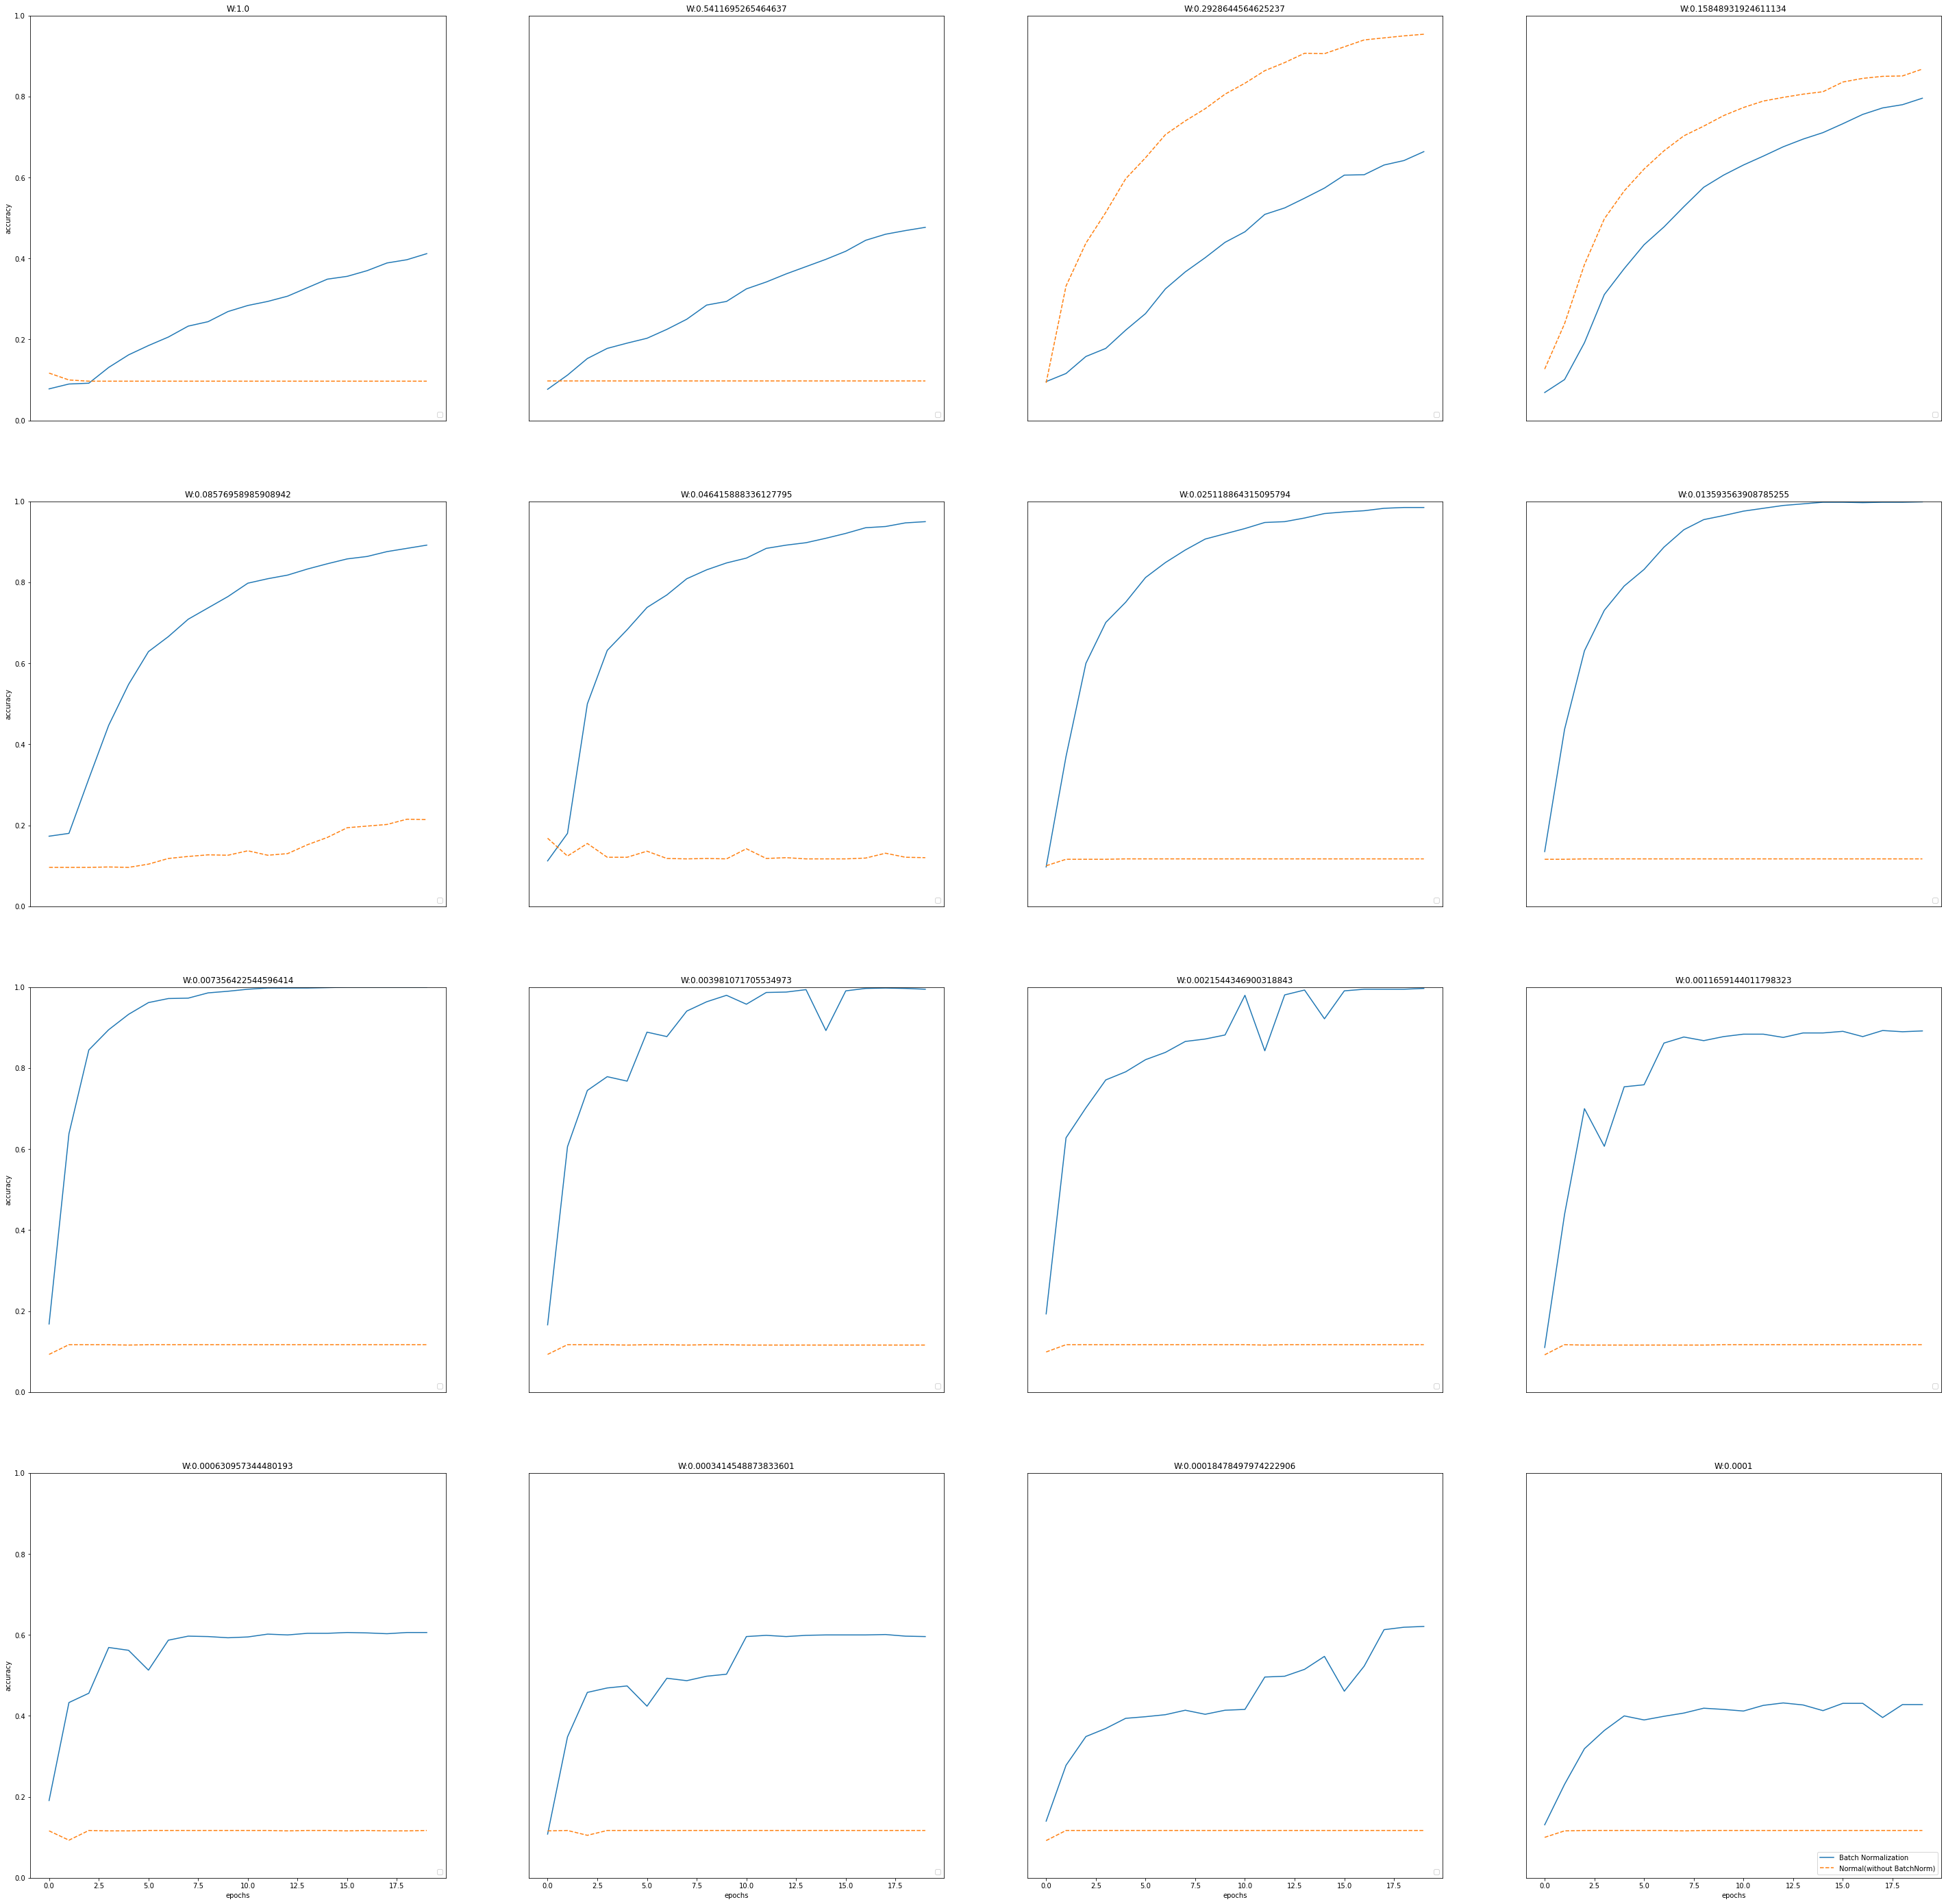

In [52]:
# 그래프 그리기==========
weight_scale_list = np.logspace(0, -4, num=16)
x = np.arange(max_epochs)
plt.figure(figsize=(50, 50))
for i, w in enumerate(weight_scale_list):
    print( "============== " + str(i+1) + "/16" + " ==============")
    train_acc_list, bn_train_acc_list = __train(w)
    
    plt.subplot(4,4,i+1)
    plt.title("W:" + str(w))
    if i == 15:
        plt.plot(x, bn_train_acc_list, label='Batch Normalization', markevery=2)
        plt.plot(x, train_acc_list, linestyle = "--", label='Normal(without BatchNorm)', markevery=2)
    else:
        plt.plot(x, bn_train_acc_list, markevery=2)
        plt.plot(x, train_acc_list, linestyle="--", markevery=2)

    plt.ylim(0, 1.0)
    if i % 4:
        plt.yticks([])
    else:
        plt.ylabel("accuracy")
    if i < 12:
        plt.xticks([])
    else:
        plt.xlabel("epochs")
    plt.legend(loc='lower right')
    
plt.show()

## 결론
배치 정규화를 사용하면 학습이 빨라지며, 가중치 초깃값에 크게 의존하지 않아도 된다.
***

# 오버피팅(Overfitting)
오버피팅은 주로 다음의 두 경우에 일어난다.   
1) 매개변수가 많고 표현력이 높은 모델    
2) 훈련 데이터가 적음

In [53]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)
# 오버 피팅을 재현하기 위해 학습 데이터 수를 줄임
x_train = x_train[:300]
t_train = t_train[:300]

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10)
optimizer = SGD(lr=0.01) # 학습률이 0.01인 SGD로 매개변수 갱신
max_epochs = 201
train_size = x_train.shape[0]
print('train_size: ', x_train.shape[0])
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
print('iteration per epoch: ', iter_per_epoch)
epoch_cnt = 0

for i in range(1000000000):
  '''
  numpy.random.choice(a, size=None, replace=True, p=None)
    a : 1차원 배열 또는 정수 (정수인 경우, np.arange(a) 와 같은 배열 생성)
    size : 정수 또는 튜플(튜플인 경우, 행렬로 리턴됨. (m, n, k) -> m * n * k), optional
    replace : 중복 허용 여부, boolean, optional
    p : 1차원 배열, 각 데이터가 선택될 확률, optional
  '''
  batch_mask = np.random.choice(train_size, batch_size)
  x_batch = x_train[batch_mask]
  t_batch = t_train[batch_mask]

  grads = network.gradient(x_batch, t_batch)
  optimizer.update(network.params, grads)

  if i % iter_per_epoch == 0:
    train_acc = network.accuracy(x_train, t_train)
    test_acc = network.accuracy(x_test, t_test)
    train_acc_list.append(train_acc)
    test_acc_list.append(test_acc)

    epoch_cnt += 1
    if epoch_cnt >= max_epochs:
      break

train_size:  300
iteration per epoch:  3.0


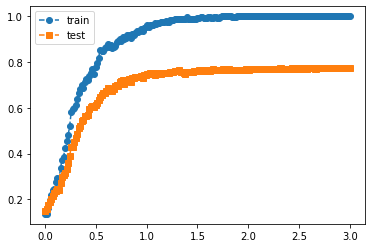

In [62]:
x = np.linspace(0, iter_per_epoch, 201)

plt.plot(x, train_acc_list, '--o',label='train')
plt.plot(x, test_acc_list, '--s', label='test')
plt.legend()

훈련 데이터를 사용하여 측정한 정확도는 100 에폭을 지나는 무렵부터 거의 100%를 띈다. 그러나 시험 데이터에 대해서는 큰 차이를 보인다. 이처럼 정확도가 크게 벌어지는 것은 훈련데이터에만 과도하게 적응해버린 결과이다.

# 가중치 감소
* 학습 과정에서 큰 가중치에 대해서는 그에 상응하는 큰 페널티를 부과하여 오버피팅을 억제하는 방법(오버피팅은 가중치 매개변수의 값이 커서 발생하는 경우가 대부분이기 때문)
* 가중치 감소에서는 모든 가중치 각각의 손실 함수에 가중치의 제곱 놈(L2-norm)을 더해주어 가중치의 기울기를 구할 때 오차역전파법에 따른 결과에 정규화 항을 미분한 $λW$를 더한다.
* $L(W)+\frac{1}{2}λW^2$
* $λ$는 정규화의 세기를 조절하는 하이퍼파라미터. 이를 크게 설정할수록 큰 가중치에 대한 페널티가 커진다.

# 드롭아웃(Dropout)
* 드롭아웃은 뉴런을 임의로 삭제하면서 학습하는 방법
* 훈련 때 은닉층의 뉴런을 무작위로 골라 삭제한다.
* 삭제된 뉴런은 오른쪽 그림과 같이 신호를 전달하지 않게 된다.
* 훈련때는 데이터를 흘릴 때마다 삭제할 뉴런을 무작위로 선택하고, 시험때는 모든 뉴런에 신호를 전달한다.
* 단 시험때는 각 류런의 출력에 훈련 때 삭제한 비율을 곱하여 출력한다.
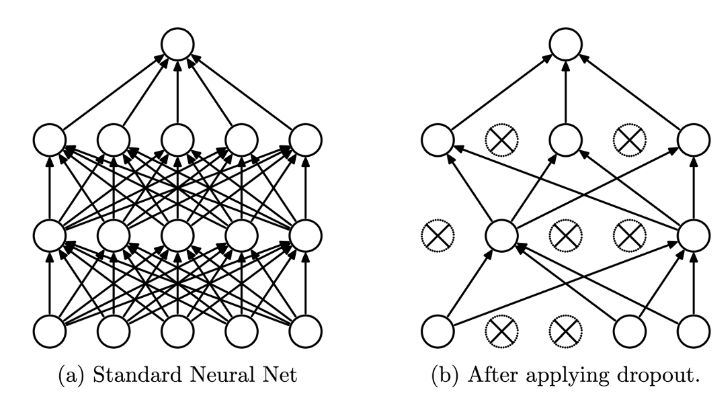

In [71]:
class Dropout:
  def __init__(self, dropout_ratio=0.5):
    self.dropout_ratio = dropout_ratio
    self.mask = None

  '''
  random.rand() 함수는 주어진 형태의 난수 어레이를 생성, [0, 1) 범위에서 균일한 분포를 갖는다.

  순전파때마다 self.mask에 삭제할 뉴런을 False로 표시한다.
  self.mask는 x와 형상이 같은 배열을 무작위로 생성하고, 그 값이 droout_raio보다 큰 원소만 True로 설정한다.
  순전파 때 신호를 통과시키는 뉴런은 역전파 때도 신호를 그대로 통과시키고, 순전파 때 통과시키지 않은 뉴런은 역전파 때도 신호를 차단
  '''
  def forward(self, x, train_flg=True):
    if train_flg:
      self.mask = np.random.rand(*x.shape) > self.dropout_ratio # boolean으로 된 원소를 가지는 행렬 생성
      return x * self.mask # True값이 1이므로 x값이 그대로 통과, False값이 0이므로 x값이 통과 X
    
    else:
      return x * (1.0 - self.dropout_ratio)
  
  def backward(self, dout):
    return dout * self.mask

train loss:2.3499312030979356
=== epoch:1, train acc:0.10666666666666667, test acc:0.1036 ===
train loss:2.284174473620651
train loss:2.311173749009558
train loss:2.3067627063855323
=== epoch:2, train acc:0.11666666666666667, test acc:0.1059 ===
train loss:2.338362573719904
train loss:2.2924101750671593
train loss:2.3014090793861355
=== epoch:3, train acc:0.14, test acc:0.1111 ===
train loss:2.3469875585076347
train loss:2.325022771497189
train loss:2.337893119221767
=== epoch:4, train acc:0.13333333333333333, test acc:0.1109 ===
train loss:2.311116983687035
train loss:2.3095146991354323
train loss:2.291399498008597
=== epoch:5, train acc:0.14, test acc:0.1087 ===
train loss:2.3324358273483297
train loss:2.3082283289148986
train loss:2.317941111726704
=== epoch:6, train acc:0.14333333333333334, test acc:0.1146 ===
train loss:2.318198840753094
train loss:2.3147752604618725
train loss:2.304727540792696
=== epoch:7, train acc:0.14333333333333334, test acc:0.1172 ===
train loss:2.288354178

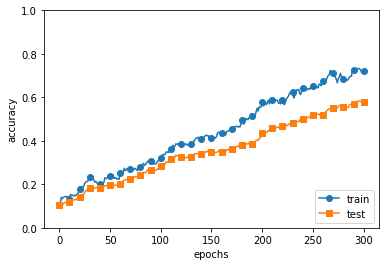

In [72]:
from common.trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 오버피팅을 재현하기 위해 학습 데이터 수를 줄임
x_train = x_train[:300]
t_train = t_train[:300]

# 드롭아웃 사용 유무와 비울 설정 ========================
use_dropout = True  # 드롭아웃을 쓰지 않을 때는 False
dropout_ratio = 0.2
# ====================================================

network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                              output_size=10, use_dropout=use_dropout, dropout_ration=dropout_ratio)
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=301, mini_batch_size=100,
                  optimizer='sgd', optimizer_param={'lr': 0.01}, verbose=True)
trainer.train()

train_acc_list, test_acc_list = trainer.train_acc_list, trainer.test_acc_list

# 그래프 그리기==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

# 드롭아웃 적용 결과
* 드롭아웃을 적용함으로써 훈련 데이터와 시험 데이터에 대한 정확도 차이가 줄어든다. 또한 훈련 데이터에 대한 정확도가 100%에 도달하지도 않게 되었다. 이처럼 드롭아웃을 이용하면 표현력을 높이면서도 오버피팅을 억제할 수 있다.

# 적절한 하이퍼파라미터 값 찾기
하이퍼 파라미터: 각 층의 뉴런 수, 배치 크기, 매개변수 갱신 시의 학습률과 가중치 감소 등
하이퍼 파라미터의 값을 최대한 효율적으로 탐색하는 방법
1. 검증데이터 이용   

```
* 훈련 데이터(Train): 매개변수 학습
* 검증 데이터(Validation): 하이퍼파라미터 성능 평가
* 시험 데이터(Test): 신경망의 범용 성능 평가
```

In [75]:
def shuffle_dataset(x, t):
    print('x_train.shape, t_train.shape:', x.shape, t.shape)
    
    """데이터셋을 뒤섞는다.

    Parameters
    ----------
    x : 훈련 데이터
    t : 정답 레이블
    
    Returns
    -------
    x, t : 뒤섞은 훈련 데이터와 정답 레이블
    """
    
    permutation = np.random.permutation(x.shape[0]) # np.random.permutation(10) --> result: array([1, 7, 4, 3, 0, 9, 2, 5, 8, 6]) # random
    x = x[permutation,:] if x.ndim == 2 else x[permutation,:,:,:]
    t = t[permutation]

    return x, t

In [76]:
# 훈련 데이터를 분리하기 전에 입력 데이터와 정답 레이블을 뒤섞는다. 데이터 셋 안의 데이터가 편향되어 있을지도 모르기 때문
(x_train, t_train), (x_test, t_test) = load_mnist()

# 훈련 데이터를 뒤섞는다.
x_train, t_train = shuffle_dataset(x_train, t_train)

# 20%를 검증 데이터로 분할
validation_rate = 0.20
validation_num = int(x_train.shape[0] * validation_rate)

x_val = x_train[:validation_num]
t_val = t_train[:validation_num]
x_train = x_train[validation_num:]
t_train = t_train[validation_num:]

x_train.shape, t_train.shape: (60000, 784) (60000,)


# 하이퍼 파라미터의 최적화하는 절차
```
* 0단계: 하이퍼 파라미터 값의 대략적으로 범위를 설정한다.(0.001 ~ 1000사이와 같이 10의 거듭제곱 단위로 범위를 지정, 즉 로그 스케일로 지정)
* 1단계: 설정된 범위에서 하이퍼 파라미터의 값을 무작위로 추출한다.
* 2단계: 1단계에서 샘플링한 하이퍼파라미터 값을 사용하여 학습하고, 검증 데이터로 정확도를 평가한다.(단, 에폭은 작게 설정)
* 3단계: 1단계와 2단계를 특정 횟수(100회 등)반복하며, 그 정확도의 결과를 보고 하이퍼파라미터의 범위를 좁혀나간다.
```

x_train.shape, t_train.shape: (500, 784) (500,)
val acc:0.09 | lr:0.0001315888891951396, weight decay:3.636276953968954e-05
val acc:0.04 | lr:2.95503091215175e-06, weight decay:6.127699360820247e-06
val acc:0.57 | lr:0.007407036501331309, weight decay:8.880043162986761e-05
val acc:0.1 | lr:1.5814440309462564e-06, weight decay:1.095861945045382e-06
val acc:0.07 | lr:3.609949296144279e-06, weight decay:4.369597662219869e-07
val acc:0.17 | lr:0.00046836629224510703, weight decay:2.0631516395466843e-05
val acc:0.55 | lr:0.003752603599051079, weight decay:2.2786099825510686e-05
val acc:0.15 | lr:2.9349101605979003e-06, weight decay:3.274115815628814e-07
val acc:0.13 | lr:7.297399703492736e-05, weight decay:6.30680808444395e-06
val acc:0.25 | lr:0.002003484081435093, weight decay:1.3195200626188374e-08
val acc:0.07 | lr:4.481849420545546e-05, weight decay:2.4961574648049967e-07
val acc:0.15 | lr:0.0003600607641565258, weight decay:3.4178217660655596e-06
val acc:0.6 | lr:0.00417081397044588, 

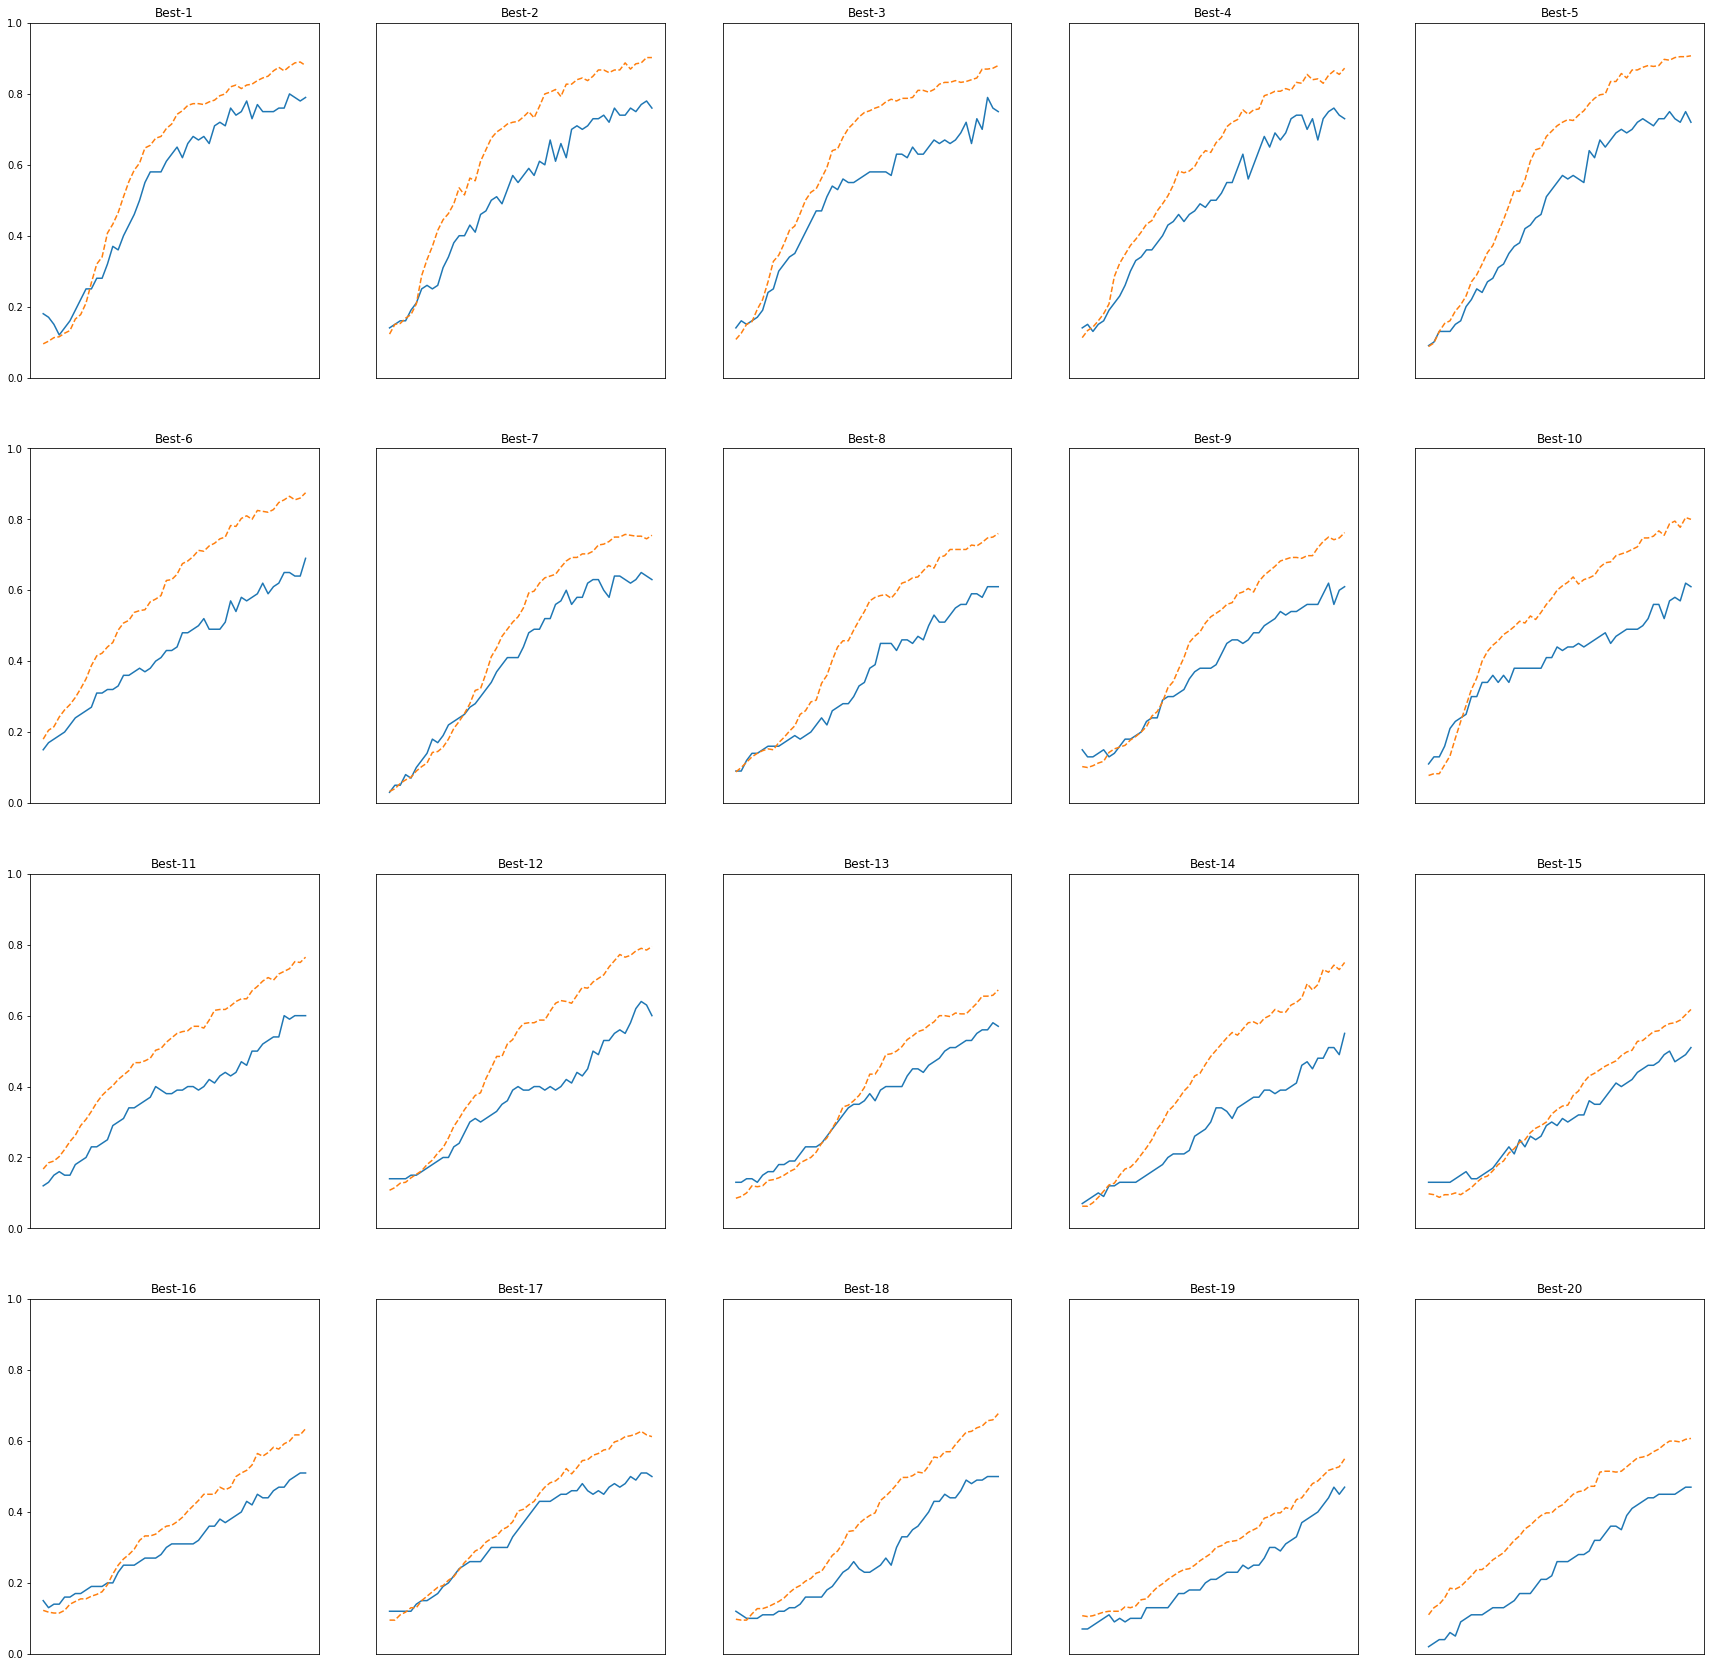

In [77]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 결과를 빠르게 얻기 위해 훈련 데이터를 줄임
x_train = x_train[:500]
t_train = t_train[:500]

# 20%를 검증 데이터로 분할
validation_rate = 0.20
validation_num = int(x_train.shape[0] * validation_rate)
x_train, t_train = shuffle_dataset(x_train, t_train)
x_val = x_train[:validation_num]
t_val = t_train[:validation_num]
x_train = x_train[validation_num:]
t_train = t_train[validation_num:]


def __train(lr, weight_decay, epocs=50):
    network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                            output_size=10, weight_decay_lambda=weight_decay)
    trainer = Trainer(network, x_train, t_train, x_val, t_val,
                      epochs=epocs, mini_batch_size=100,
                      optimizer='sgd', optimizer_param={'lr': lr}, verbose=False)
    trainer.train()

    return trainer.test_acc_list, trainer.train_acc_list


# 하이퍼파라미터 무작위 탐색======================================
optimization_trial = 100
results_val = {}
results_train = {}
for _ in range(optimization_trial):
    # 탐색한 하이퍼파라미터의 범위 지정===============
    weight_decay = 10 ** np.random.uniform(-8, -4) # 가중치 감소 계수: 10^-8 ~ 10^-4의 범위
    lr = 10 ** np.random.uniform(-6, -2) # 학습률: 10^-6 ~ 10^-2의 범위
    # ================================================

    val_acc_list, train_acc_list = __train(lr, weight_decay)
    print("val acc:" + str(val_acc_list[-1]) + " | lr:" + str(lr) + ", weight decay:" + str(weight_decay))
    key = "lr:" + str(lr) + ", weight decay:" + str(weight_decay)
    results_val[key] = val_acc_list
    results_train[key] = train_acc_list

# 그래프 그리기========================================================
plt.figure(figsize=(30, 30))
print("=========== Hyper-Parameter Optimization Result ===========")
graph_draw_num = 20
col_num = 5
row_num = int(np.ceil(graph_draw_num / col_num))
i = 0

for key, val_acc_list in sorted(results_val.items(), key=lambda x:x[1][-1], reverse=True):
    print("Best-" + str(i+1) + "(val acc:" + str(val_acc_list[-1]) + ") | " + key)

    plt.subplot(row_num, col_num, i+1)
    plt.title("Best-" + str(i+1))
    plt.ylim(0.0, 1.0)
    if i % 5: plt.yticks([])
    plt.xticks([])
    x = np.arange(len(val_acc_list))
    plt.plot(x, val_acc_list)
    plt.plot(x, results_train[key], "--")
    i += 1

    if i >= graph_draw_num:
        break

plt.show()

# 총정리

* 매개변수 갱신 방법에는 확률적 경사 하강법(SGD)외에도 모멘텀, AdaGrad, Adam등이 있다.
* 가중치 초깃값을 정하는 방법은 올바른 학습을 하는데 매우 중요하다.
* 가중치의 초깃값으로는 'Xavier 초깃값'과 'He 초깃값'이 효과적이다.
* 배치 정규화를 이용하면 학습을 빠르게 진행할 수 있으며, 초깃값에 영향을 덜 받게 된다.
* 오버피팅을 억제하는 정규화 기술로는 가중치 감소와 드롭아웃이 있다.
* 하이퍼파라미터 값 탐색은 최적 값이 존재할 법한 범위를 점차 좁히면서 하는 것이 효과적이다.
